<h3><b>Question 1: Given some sample data, write a program to answer the following: https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0
<br>

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. <br>

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br>
b.	What metric would you report for this dataset?<br>
c.	What is its value?


In [4]:
import pandas as pd
df=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
#df=pd.read_csv('C:\DS&AI\Vimala\Python\interview\DS.csv')
#df= pd.read_excel('C:\DS&AI\Vimala\Python\interview\2019 Winter Data Science Intern Challenge Data Set (1).xlsx')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


<h3><b>
AOV : Average Order Value is defined as average amount spend by a customer for each order<br>
To increase the sales, one can add promotions like free delivery change when order value is more than AOV <br>
In the case statemnet, AOV = Total order amount/Number of orders =3145.13.
if we use this as margin to avail the free delivery charge, then client will not gain anything 

<br><br>

There are possible outliers which is causing this peak in AOV, lets analyse deeper to get the details

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


<h2><b>There are no Null values  <br>
Except for payment_method and created_at field, the type is numerical

In [68]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<h2><b>The AOV is 3145.13 but the 50%(median) is 284. Which means there are outliers <br>

May be some sellers are selling the product for more amount. 


In [69]:
df['price']=df['order_amount']/df['total_items']
df1=df[['shop_id','price']].drop_duplicates()
df1=df1.sort_values(by='price',ascending=False)
df1.head()

,shop_id,price
160,78,25725.0
15,42,352.0
107,12,201.0
205,89,196.0
44,99,195.0


<h2><b>Checking visually which shop sells for more amount: <br>
We can see that shop number 78 sells each sneaker for >25000 dollers which is very much greater than the second largest value that is 352

<AxesSubplot:xlabel='shop_id', ylabel='price'>

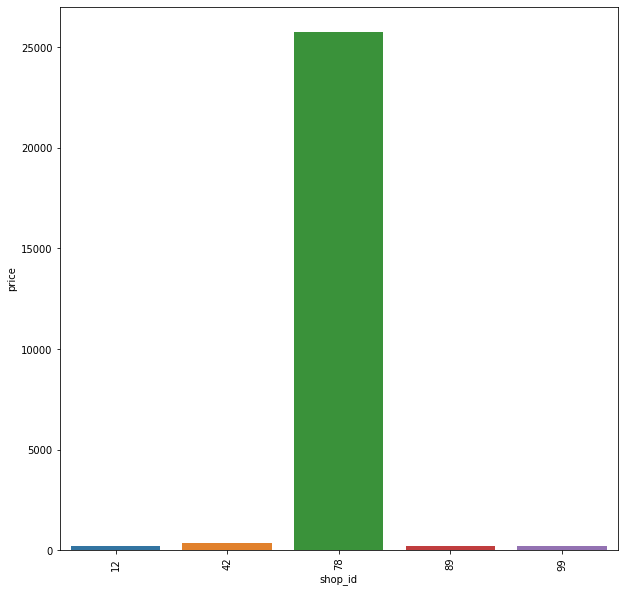

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(data=df1.head(),y='price',x='shop_id')

<h3> <b> There are 46 orders from shop ID: 78, removing them to calculate the new value

In [72]:
len(df[df['shop_id'] == 78])

46

In [73]:
df2 = df[df['shop_id'] != 78]
df2.describe()

,order_id,shop_id,user_id,order_amount,total_items,price
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


<h3><b>The AOV is 2717 and the median is 284 which is still not good enough for business decision

<AxesSubplot:xlabel='shop_id', ylabel='price'>

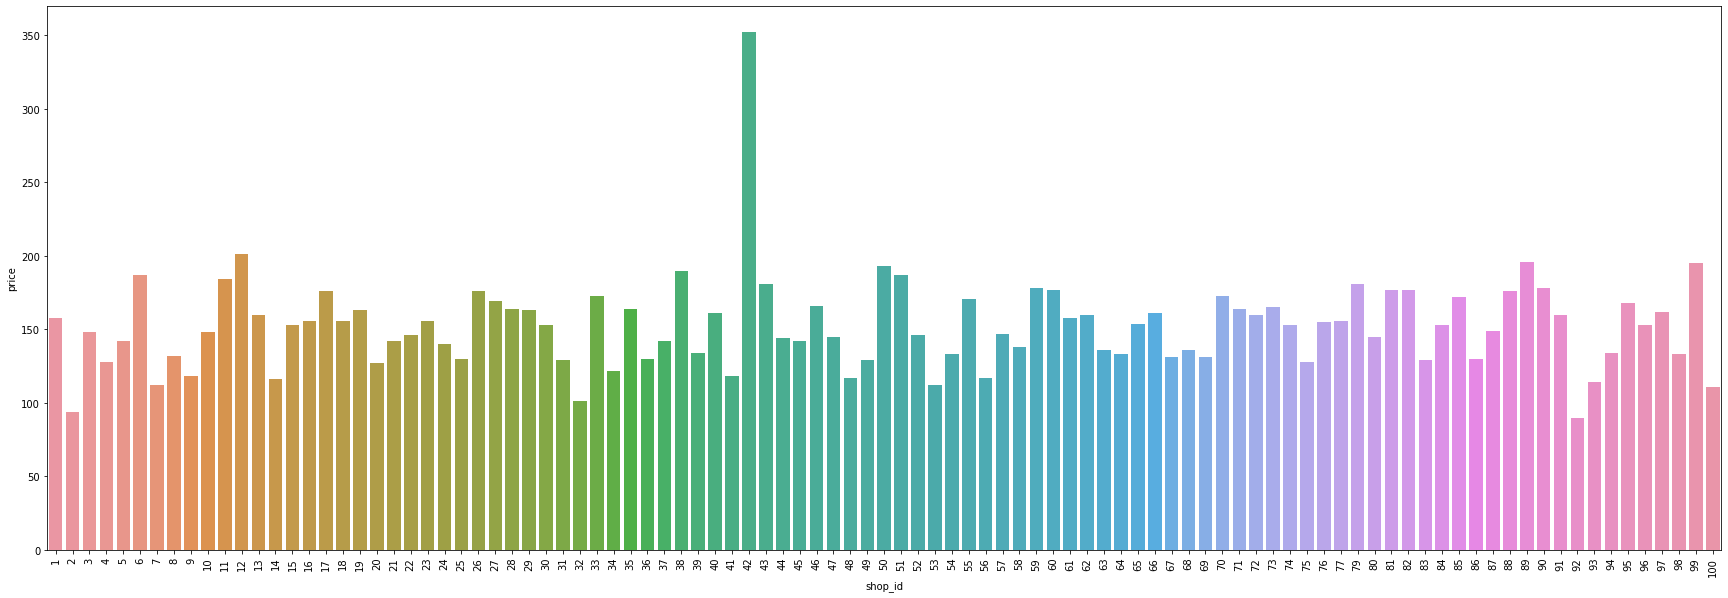

In [74]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df2[df2['shop_id'] != 78],y='price',x='shop_id')

<h3><b> Shop number 42 is also an outlier. Let's analyse more before we remove it <br>
We can see from below that shop number 42 has the 2000 items in each order <br>
It is clearly an outlier, so we will remove that shopi id as well

In [91]:
df2.groupby(by=['total_items'],as_index=False).mean()

,total_items,order_id,shop_id,user_id,order_amount,price
0,1,2519.954721,50.029818,851.972391,151.850911,151.850911
1,2,2507.092511,49.707599,848.227974,303.520925,151.760463
2,3,2467.508584,49.879828,850.748927,457.326180,152.442060
3,4,2434.184932,49.743151,845.589041,598.534247,149.633562
4,5,2375.415584,47.272727,840.922078,759.350649,151.870130
5,6,3277.250000,64.000000,828.625000,888.750000,148.125000
6,8,4142.000000,54.000000,733.000000,1064.000000,133.000000
7,2000,2336.235294,42.000000,607.000000,704000.000000,352.000000


In [76]:
df[df['total_items']==2000].sort_values(by=['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price
520,521,42,607,704000,2000,credit_card,02-03-2017 04:00,352.0
4646,4647,42,607,704000,2000,credit_card,02-03-2017 04:00,352.0
60,61,42,607,704000,2000,credit_card,04-03-2017 04:00,352.0
15,16,42,607,704000,2000,credit_card,07-03-2017 04:00,352.0
2297,2298,42,607,704000,2000,credit_card,07-03-2017 04:00,352.0
1436,1437,42,607,704000,2000,credit_card,11-03-2017 04:00,352.0
2153,2154,42,607,704000,2000,credit_card,12-03-2017 04:00,352.0
1362,1363,42,607,704000,2000,credit_card,15-03-2017 04:00,352.0
1602,1603,42,607,704000,2000,credit_card,17-03-2017 04:00,352.0
1562,1563,42,607,704000,2000,credit_card,19-03-2017 04:00,352.0


In [78]:
df3 = df2[df2['total_items'] != 2000]

In [79]:
df3.describe()

,order_id,shop_id,user_id,order_amount,total_items,price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


<h2><b>There is not much difference between the mean and 50 th percentile value. 
So we can conclude that we do not have any garbage or outliers and the Average order value will be useful when we use it.

In [76]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   int64  
 1   shop_id         5000 non-null   int64  
 2   user_id         5000 non-null   int64  
 3   order_amount    5000 non-null   int64  
 4   total_items     5000 non-null   int64  
 5   payment_method  5000 non-null   object 
 6   created_at      5000 non-null   object 
 7   price           5000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 312.6+ KB


In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        4937 non-null   int64  
 1   shop_id         4937 non-null   int64  
 2   user_id         4937 non-null   int64  
 3   order_amount    4937 non-null   int64  
 4   total_items     4937 non-null   int64  
 5   payment_method  4937 non-null   object 
 6   created_at      4937 non-null   object 
 7   price           4937 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 347.1+ KB


<h3><b> we have removed 63 rows from the data set.<br>

New AOV:302<br>
50% have: 284 as avearge order value<br>
75% have : 387

If we introduce 302 as order amount will give them a free delivery charge;<br>
since the difference is very less from 284, there is a high possibility of increasing the AOV for 50% of the orders <br>


<h3><b>
a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br>
 <p style="background-color:DodgerBlue;"><i> There are outliers, so the average order value calculation is getting affected<br> 
 Shopd ID 42(Rate of per sneaker was absurdly large) and 78(There were 2000 orders per day eventhough price of each sneaker was less)</i></p>

b.	What metric would you report for this dataset?<br>
<p style="background-color:DodgerBlue;"><i>It is better to use Median metrix for this report as it is not advisable to delete data <br></p></i>

c.	What is its value?<br>
<i><p style="background-color:DodgerBlue;">New AOV:  302</p><br></i>